In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Getting our data into Python

We're going to start off with reading our given `insurance.csv` file; which is a little tricky considering it has a bunch of non-numeric information like the region.
So we're also going to be stripping out the columns and headers, and converting the data into numbers that we can work with.

In [2]:
# Load the csv as a numpy array of strings, 
# because we need to strip out the sex, smoker, and region columns to utilize the numbers
raw_data = np.loadtxt('insurance.csv', delimiter=',', dtype=str)

# Just putting "raw_data" here prints out said variable as it would in a normal console
raw_data

array([['age', 'sex', 'bmi', ..., 'smoker', 'region', 'charges'],
       ['19', 'female', '27.9', ..., 'yes', 'southwest', '16884.924'],
       ['18', 'male', '33.77', ..., 'no', 'southeast', '1725.5523'],
       ...,
       ['18', 'female', '36.85', ..., 'no', 'southeast', '1629.8335'],
       ['21', 'female', '25.8', ..., 'no', 'southwest', '2007.945'],
       ['61', 'female', '29.07', ..., 'yes', 'northwest', '29141.3603']],
      dtype='<U11')

In [3]:
# First lets delete the columns we don't need
# (see numpy's delete documentation)
stripped = np.delete(raw_data, [1, 4, 5], axis=1)

# We also need to remove the first row which is just the names of each column
stripped = np.delete(stripped, [0], axis=0)

# Next lets convert the strings into usable numbers
clean_data = np.matrix(stripped, dtype=float)

clean_data

matrix([[1.90000000e+01, 2.79000000e+01, 0.00000000e+00, 1.68849240e+04],
        [1.80000000e+01, 3.37700000e+01, 1.00000000e+00, 1.72555230e+03],
        [2.80000000e+01, 3.30000000e+01, 3.00000000e+00, 4.44946200e+03],
        ...,
        [1.80000000e+01, 3.68500000e+01, 0.00000000e+00, 1.62983350e+03],
        [2.10000000e+01, 2.58000000e+01, 0.00000000e+00, 2.00794500e+03],
        [6.10000000e+01, 2.90700000e+01, 0.00000000e+00, 2.91413603e+04]])

In [4]:
# Lets make a helper functiont to split up our X and Y matrices
def split_input_output(data):
    """
    Splits the input array into two seperate sets:
        * the feature values
        * the output value
        
    :returns: (tuple) the features are the first element, the outputs are the second
    """
    return np.delete(data, [data.shape[1] - 1], axis=1), data[:, -1]

In [5]:
# Test it out!
x, y = split_input_output(clean_data)

In [6]:
y

matrix([[16884.924 ],
        [ 1725.5523],
        [ 4449.462 ],
        ...,
        [ 1629.8335],
        [ 2007.945 ],
        [29141.3603]])

In [7]:
x

matrix([[19.  , 27.9 ,  0.  ],
        [18.  , 33.77,  1.  ],
        [28.  , 33.  ,  3.  ],
        ...,
        [18.  , 36.85,  0.  ],
        [21.  , 25.8 ,  0.  ],
        [61.  , 29.07,  0.  ]])

# Selecting Training and Testing data

The meat of this assignment involves doing multiple trials with differing ratios of training and testing data. So we need a convenient way to split up the data we now have into two sets.

In [8]:
def get_sets(data, split):
    """
    Convenience function that randomly selects a training and test set from the input data.
    
    :param data: (ndarray) the data you want to split
    :param split: (float) the percentage of the data you want to be TRAINING data
    
    :returns: (tuple) a tuple where the first element is the training set, and the second element is the test set
    """
    # calc the number of samples, assumes the input samples are seperated by row
    training_count = round(data.shape[0] * split)
    
    # Numpy thankfully gives us a cool way to generate the random selections
    picks = np.random.choice(data.shape[0], training_count, replace=False)
    
    training_set = []
    test_set = []
    
    # Convert the input data to a regular python list, because otherwise it gets weird later
    t_data = data.tolist()
    
    # Stick in values of 1.0 at the beginning of the data, for the bias value
    for l in t_data:
        l.insert(0, 1.0)
    
    # Iterate through the data, putting the ones that match our choices into the training set
    for i in range(len(t_data)):
        if i in picks:
            training_set.append(t_data[i])
        else:
            test_set.append(t_data[i])
    
    return np.matrix(training_set), np.matrix(test_set)

In [9]:
# Lets do an example of splitting our data into two sets, 50/50 split
training_set, test_set = get_sets(clean_data, .50)

# Print the size of the two sets
print(training_set.shape)
print(test_set.shape)

print('*' * 80)

# Print the first 5 data points of each, for the fun of it
print(training_set[:5])
print('*' * 80)
print(test_set[:5])
print('*' * 80)

# Also we can call `split_input_output` on these
training_x, training_y = split_input_output(training_set)
test_x, test_y = split_input_output(test_set)

print(f'first 5 feature sets = \n{training_x[:5]}\n')
print(f'first 5 outputs = \n{training_y[:5]}\n')

(669, 5)
(669, 5)
********************************************************************************
[[1.0000000e+00 1.8000000e+01 3.3770000e+01 1.0000000e+00 1.7255523e+03]
 [1.0000000e+00 2.8000000e+01 3.3000000e+01 3.0000000e+00 4.4494620e+03]
 [1.0000000e+00 3.1000000e+01 2.5740000e+01 0.0000000e+00 3.7566216e+03]
 [1.0000000e+00 4.6000000e+01 3.3440000e+01 1.0000000e+00 8.2405896e+03]
 [1.0000000e+00 2.5000000e+01 2.6220000e+01 0.0000000e+00 2.7213208e+03]]
********************************************************************************
[[1.00000000e+00 1.90000000e+01 2.79000000e+01 0.00000000e+00
  1.68849240e+04]
 [1.00000000e+00 3.30000000e+01 2.27050000e+01 0.00000000e+00
  2.19844706e+04]
 [1.00000000e+00 3.20000000e+01 2.88800000e+01 0.00000000e+00
  3.86685520e+03]
 [1.00000000e+00 3.70000000e+01 2.77400000e+01 3.00000000e+00
  7.28150560e+03]
 [1.00000000e+00 3.70000000e+01 2.98300000e+01 2.00000000e+00
  6.40641070e+03]]
*****************************************************

# Linear Regression

Now that we have data that we can actually do regression on, lets whip up some functions to do the normal equation and also apply our hypotheses to test data to get estimates.

In [10]:
def normal_eq(x_matrix, y_matrix):
    """
    Does the normal equation!
    
    :param x_matrix: (matrix) set of feature values
    :param y_matrix: (matrix) set of output values
    
    :returns: (matrix) a 1-dimensional array of THETA VALUES!!!! (the hypothesis)
    """
    xt_matrix = x_matrix.getT()
    
    inverted_term = (xt_matrix * x_matrix).getI()
    
    t = inverted_term * xt_matrix
    return t * y_matrix
    

In [11]:
# Note we have to actually convert everything to matrices (instead of just numpy arrays)
h = normal_eq(training_x, training_y)
h

matrix([[-3417.35945692],
        [  210.722273  ],
        [  244.12257796],
        [  718.9765076 ]])

In [12]:
# Yes I know this isn't a word, I just couldn't resist
def hypothesize(h_matrix, test_x_matrix):
    """
    Applies a set of hypothesis values to some test feature values to get an estimated output.
    
    :param h_matrix: the hypothesis (or theta) matrix
    :param test_x_matrix: the matrix of feature values that we want to predict on
    
    :returns: a matrix of predicted output values!
    """
    return test_x_matrix * h_matrix

In [13]:
hypothesis_y = hypothesize(h, test_x)

# We got some estimated values!
hypothesis_y

matrix([[ 7397.38365516],
        [ 9079.2786846 ],
        [10376.01333052],
        [13308.25447943],
        [13099.49415977],
        [15534.10433743],
        [18104.04888535],
        [12557.02612353],
        [ 7310.75565548],
        [ 7250.35569351],
        [11532.85676655],
        [12258.56702112],
        [12658.85290655],
        [17939.2620338 ],
        [15493.71345414],
        [17611.43606581],
        [ 6392.30034748],
        [ 9909.29432446],
        [ 6799.72709609],
        [11163.15199772],
        [16769.25392399],
        [12087.90253241],
        [ 5572.56738489],
        [18966.46778358],
        [ 8133.63566879],
        [13495.19405193],
        [13336.29306039],
        [14353.80493805],
        [17278.13771589],
        [10971.00622273],
        [13480.73362283],
        [ 9072.50829692],
        [10655.60358807],
        [12573.7827302 ],
        [14055.42210329],
        [14479.82153778],
        [16817.67019814],
        [ 9533.15975403],
        [ 83

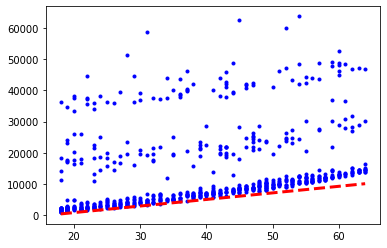

In [14]:
# Plot premium as a function of age!
x = test_x[:, 1].flatten()
y = test_y.flatten()

m = float(h[1,0])
b = float(h[0,0])

xh = np.arange(x.min(), x.max() + 1)
yh = xh * m + b

plt.plot(x,y,'bo', markersize=3)
plt.plot(xh, yh, 'r--', linewidth=3)
plt.show()

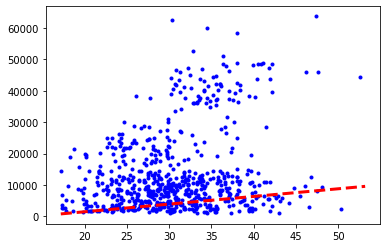

In [15]:
# Plot premium as a function of BMI!
x = test_x[:, 2].flatten()
y = test_y.flatten()

m = float(h[2,0])
b = float(h[0,0])

xh = np.arange(x.min(), x.max() + 1)
yh = xh * m + b

plt.plot(x,y,'bo', markersize=3)
plt.plot(xh, yh, 'r--', linewidth=3)
plt.show()

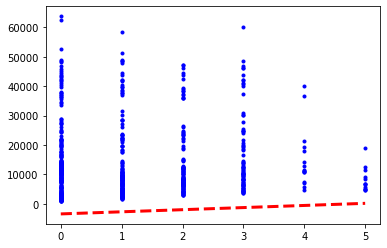

In [16]:
# Plot premium as a function of children!
x = test_x[:, 3].flatten()
y = test_y.flatten()

m = float(h[3,0])
b = float(h[0,0])

xh = np.arange(x.min(), x.max() + 1)
yh = xh * m + b

plt.plot(x,y,'bo', markersize=3)
plt.plot(xh, yh, 'r--', linewidth=3)
plt.show()

In [17]:
# ^^ yikes dog?
# Next up is doing RMSE